In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data = pd.read_excel('fraud_data.xlsx')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [4]:
data.shape

(14446, 15)

In [5]:
population_mean = data['amt'].mean()
print("Population meaan: ", population_mean)

Population meaan:  124.43007337671327


Sample mean

In [6]:
sample = data['amt'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
sample_mean

np.float64(119.54582999999998)

Impact of sample size on sample mean: As the sample size increases, the sample mean becomes a better estimator of the population mean. This is one of the key ideas of the Central Limit Theorem.

In [7]:
sample_size = [10, 50, 100, 5000, 7000]
sample_mean = [data['amt'].sample(n=size, random_state=42).mean() for size in sample_size]

for size, mean in zip(sample_size, sample_mean):
    print(f"sample size: {size}, sample mean: {mean}")

sample size: 10, sample mean: 96.85499999999999
sample size: 50, sample mean: 88.3492
sample size: 100, sample mean: 81.8355
sample size: 5000, sample mean: 123.99536800000001
sample size: 7000, sample mean: 126.52721


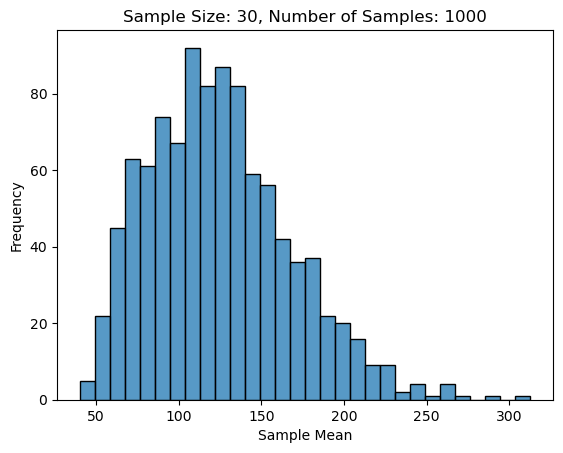

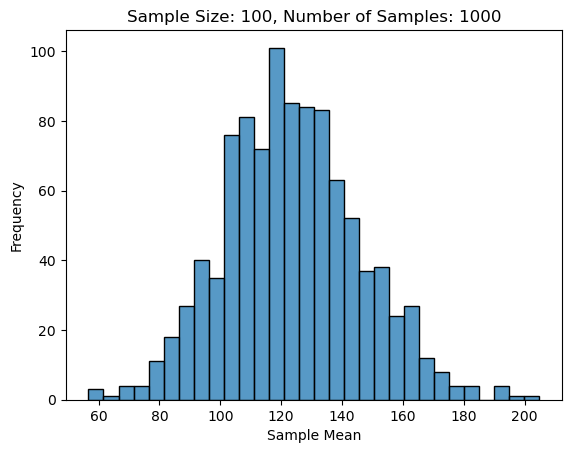

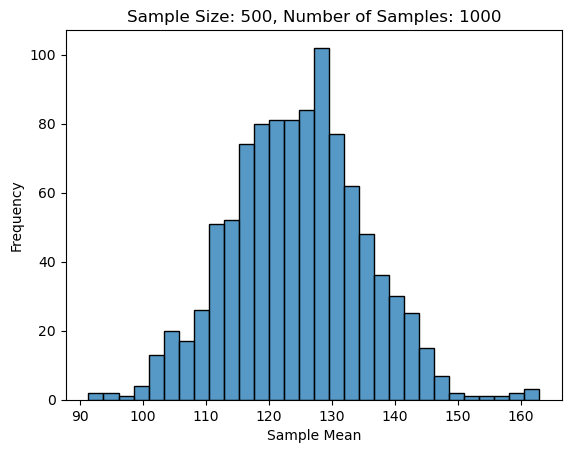

In [9]:
# function definition
def visualize_clt(data, sample_size, num_samples):
  sample_means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(num_samples)]
  sns.histplot(sample_means, bins=30, edgecolor='black')
  plt.title(f'Sample Size: {sample_size}, Number of Samples: {num_samples}')
  plt.xlabel('Sample Mean')
  plt.ylabel('Frequency')
  plt.show()


# function call
visualize_clt(data['amt'], sample_size=30, num_samples=1000)
visualize_clt(data['amt'], sample_size=100, num_samples=1000)
visualize_clt(data['amt'], sample_size=500, num_samples=1000)

In [10]:
sample_means_distribution  = [np.mean(np.random.choice(data['amt'], size=100)) for _ in range(1000)]
sample_means_distribution

[np.float64(136.7337),
 np.float64(138.1472),
 np.float64(103.13359999999999),
 np.float64(103.91399999999997),
 np.float64(171.4934),
 np.float64(90.98490000000001),
 np.float64(127.068),
 np.float64(124.68459999999999),
 np.float64(126.66830000000002),
 np.float64(153.7731),
 np.float64(110.48329999999999),
 np.float64(152.03190000000004),
 np.float64(109.13770000000001),
 np.float64(110.11219999999999),
 np.float64(132.80650000000003),
 np.float64(150.0161),
 np.float64(84.8063),
 np.float64(161.68830000000003),
 np.float64(97.6641),
 np.float64(124.74020000000004),
 np.float64(123.66680000000002),
 np.float64(105.465),
 np.float64(118.13600000000001),
 np.float64(169.86630000000002),
 np.float64(97.2105),
 np.float64(137.1657),
 np.float64(131.11299999999997),
 np.float64(123.5584),
 np.float64(169.45119999999994),
 np.float64(131.32240000000002),
 np.float64(122.48339999999999),
 np.float64(122.59750000000003),
 np.float64(115.05640000000001),
 np.float64(130.4099),
 np.float64(12

In [11]:
sampling_distribution_mean = np.mean(sample_means_distribution)
print(sampling_distribution_mean)

124.893639


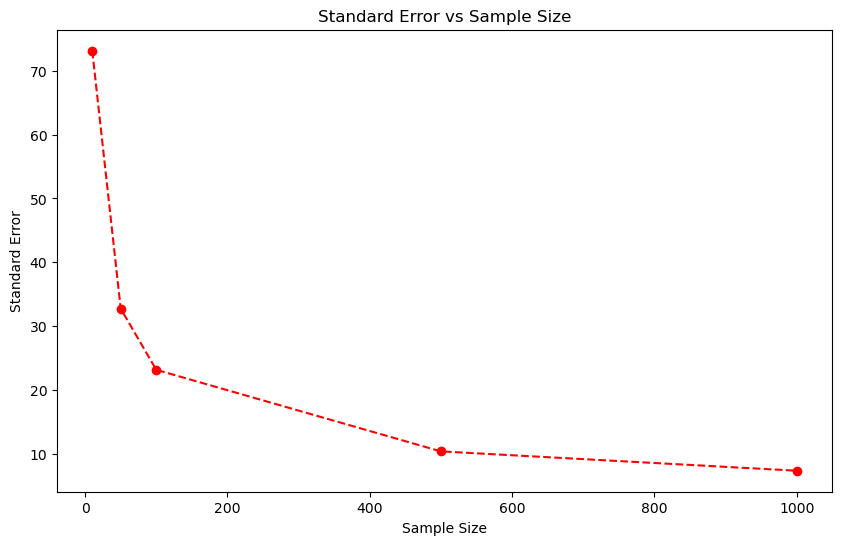

In [17]:
population_std = data['amt'].std()

sample_sizes = [10, 50, 100, 500, 1000]
standard_errors = [population_std/np.sqrt(sample_size) for sample_size in sample_sizes]
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, standard_errors, marker = 'o', linestyle='--', color='r')
plt.title('Standard Error vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')
plt.show()